<a href="https://colab.research.google.com/github/imdineshkumar24/DeepFake-Audio-Detection/blob/main/DeepFake_Audio_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DeepFake Detection System - Dataset Preprocessing**

In [ ]:
import pandas as pd

df= pd.read_csv('/content/drive/MyDrive/Deep_Fake_Audio_detection/audio_dataset.csv')
df.head()

,Folder,File_Name,Class
0,fake,file337.wav_16k.wav_norm.wav_mono.wav_silence.wav,0
1,real,file24593.wav_16k.wav_norm.wav_mono.wav_silenc...,1
2,real,file20193.wav_16k.wav_norm.wav_mono.wav_silenc...,1
3,real,file11469.wav_16k.wav_norm.wav_mono.wav_silenc...,1
4,fake,file24745.mp3.wav_16k.wav_norm.wav_mono.wav_si...,0


In [ ]:
#checking dataset
df['Class'].value_counts()

,count
Class,
0,7768
1,7664


[0.05883978 0.06975852 0.06365527 ... 0.02520306 0.02100763 0.        ]


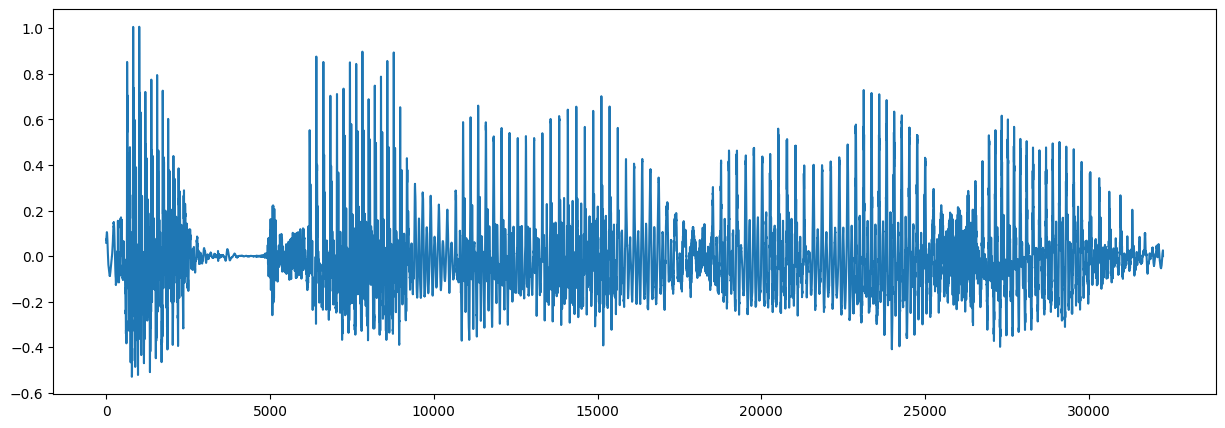

In [ ]:
import librosa
audio_file_path1='/content/drive/MyDrive/Deep_Fake_Audio_detection/fake_audio.wav'
librosa_fake_audio_data,librosa_sample_rate=librosa.load(audio_file_path1)
print(librosa_fake_audio_data)
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.plot(librosa_fake_audio_data)

[-0.07870749 -0.09798425 -0.09022726 ... -0.04033589  0.07838513
  0.0725855 ]


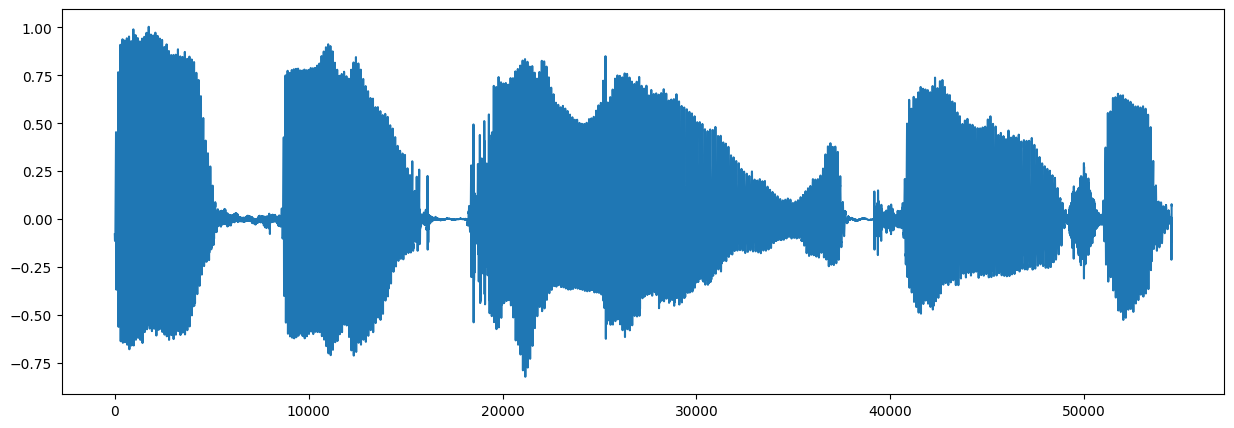

In [ ]:
import librosa
audio_file_path2='/content/drive/MyDrive/Deep_Fake_Audio_detection/real_audio.wav'
librosa_real_audio_data,librosa_sample_rate=librosa.load(audio_file_path2)
print(librosa_real_audio_data)
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.plot(librosa_real_audio_data)

In [ ]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path1)
wave_audio

array([2042, 2161, 2274, ...,  697,  734,  742], dtype=int16)

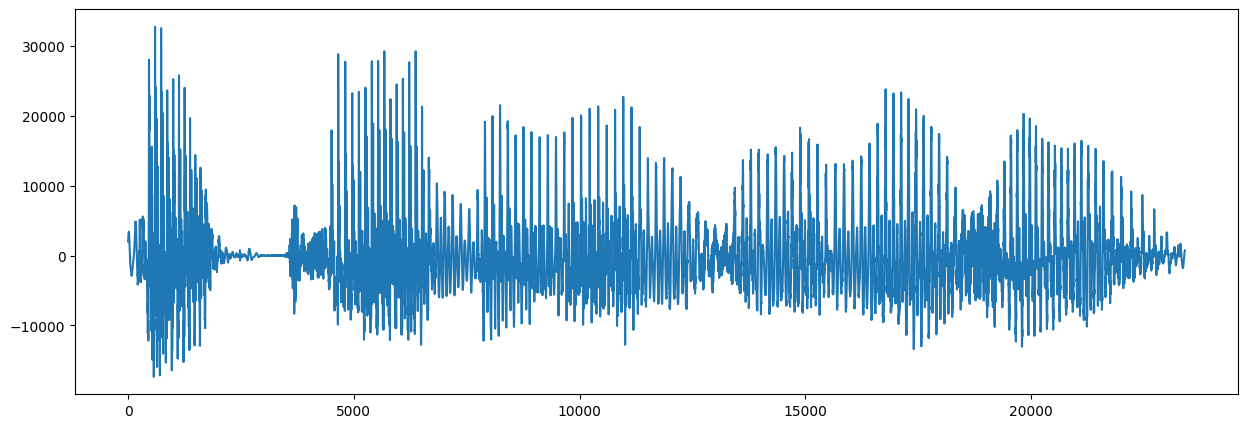

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5)) # Original audio with 2 channels
plt.plot(wave_audio)

In [ ]:
import pandas as pd
import numpy as np
import os, librosa
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Visualization
import IPython.display as ipd
import matplotlib.pyplot as plt
import seaborn as sns

# Model
from tensorflow import keras
from keras.utils import to_categorical
from keras import layers, Sequential
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization

# Metrics
from sklearn.metrics import confusion_matrix

# Suppressing warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
mfccs = librosa.feature.mfcc(y=librosa_fake_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)
print(mfccs)

(40, 64)
[[-1.84431656e+02 -9.56495361e+01 -7.51175690e+01 ... -2.57579834e+02
  -3.10057831e+02 -3.58168884e+02]
 [ 1.52183533e+02  1.89086243e+02  1.96280869e+02 ...  2.07250961e+02
   1.94758804e+02  1.44743332e+02]
 [-1.26347904e+01 -4.94993248e+01 -7.41182480e+01 ... -1.66838443e+00
   2.60962658e+01  3.41070023e+01]
 ...
 [-5.76482487e+00 -1.19274025e+01 -1.73426647e+01 ...  2.32402086e-02
   6.81319892e-01  3.13517332e+00]
 [ 4.56431806e-01  3.46175051e+00  1.44910336e+00 ... -1.72649741e+00
  -1.11870897e+00 -2.71323395e+00]
 [-1.04570770e+01 -1.41040154e+01 -1.02069807e+01 ...  5.39371431e-01
   1.35180116e+00 -1.37306690e-01]]


In [ ]:
audio_dataset_path = '/content/drive/MyDrive/Deep_Fake_Audio_detection/Real_or_Fake_audio_dataset'
metadata =  pd.read_csv('/content/drive/MyDrive/Deep_Fake_Audio_detection/audio_dataset.csv')
metadata.head()

,Folder,File_Name,Class
0,fake,file337.wav_16k.wav_norm.wav_mono.wav_silence.wav,0
1,real,file24593.wav_16k.wav_norm.wav_mono.wav_silenc...,1
2,real,file20193.wav_16k.wav_norm.wav_mono.wav_silenc...,1
3,real,file11469.wav_16k.wav_norm.wav_mono.wav_silenc...,1
4,fake,file24745.mp3.wav_16k.wav_norm.wav_mono.wav_si...,0


In [ ]:
# Computing Mel-frequency cepstral coefficients
def mfccExtract(file):
    # Loading audio file
    waveform, sampleRate = librosa.load(file_name)

    features = librosa.feature.mfcc(y = waveform, sr = sampleRate, n_mfcc = 50)
    return np.mean(features, axis = 1)

In [ ]:
extractAll = []

import numpy as np
from tqdm import tqdm
# Iterating through each row
for index_num, row in tqdm(metadata.iterrows()):
  file_name = os.path.join(audio_dataset_path,str(row['Folder']), row['File_Name'])
  # Extracting features and appending them
  features = mfccExtract(file_name)
  extractAll.append([features, row['Class']])

15432it [1:16:41,  3.35it/s]


In [ ]:
featuresDf = pd.DataFrame(extractAll, columns = ['Features', 'Class'])
featuresDf.head()

,Features,Class
0,"[-159.3308, 152.89487, -35.64067, 40.225445, -...",0
1,"[-171.27835, 130.28732, -20.71316, 60.51419, -...",1
2,"[-223.4436, 117.8803, -11.493155, 61.778946, -...",1
3,"[-228.58612, 130.93523, 2.5880032, 63.361324, ...",1
4,"[-204.77164, 152.30002, -24.727303, 48.30432, ...",0


In [ ]:
# Save to CSV
csv_path = "/content/drive/MyDrive/Deep_Fake_Audio_detection/Extracted_Features.csv"
featuresDf.to_csv(csv_path, index=False)

### **Model Implementation**

In [1]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Deep_Fake_Audio_detection/Extracted_Features.csv")
df.head()

,Features,Class
0,[-1.5933080e+02 1.5289487e+02 -3.5640671e+01 ...,0
1,[-1.7127835e+02 1.3028732e+02 -2.0713160e+01 ...,1
2,[-2.2344360e+02 1.1788030e+02 -1.1493155e+01 ...,1
3,[-2.2858612e+02 1.3093523e+02 2.5880032e+00 ...,1
4,[-204.77164 152.30002 -24.727303 4...,0


In [2]:
import numpy as np
X = np.array([np.fromstring(row.strip('[]'), sep=' ') for row in df['Features']])

y = df['Class'].values.astype(int)

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (15432, 50)
y shape: (15432,)


In [3]:
X.shape

(15432, 50)

In [4]:
y

array([0, 1, 1, ..., 1, 1, 1])

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [6]:
X_train

array([[-2.05914660e+02,  1.09315170e+02, -3.36368260e+01, ...,
         2.80892180e+00,  7.24267000e-01, -5.69210050e-01],
       [-2.15112880e+02,  1.13589500e+02, -3.17716430e+01, ...,
        -2.95135860e-01,  1.28404010e+00,  1.64392260e+00],
       [-1.49121580e+02,  1.57986240e+02, -5.08150700e+01, ...,
         6.55218030e+00,  4.77075100e+00,  5.31848050e+00],
       ...,
       [-2.05261795e+02,  1.03484375e+02, -6.12176094e+01, ...,
        -1.58337235e-01, -7.88287103e-01, -9.50527310e-01],
       [-2.17113680e+02,  1.16860280e+02, -2.44861600e+01, ...,
        -3.01693680e+00,  1.09678770e+00, -8.26089800e-01],
       [-2.10314270e+02,  1.33847960e+02, -2.19452630e+01, ...,
         2.78265640e+00,  1.66215320e+00, -1.00194310e+00]])

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(128, activation='relu', input_shape=(50,)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           6,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,849 (58.00 KB)

 Trainable params: 14,849 (58.00 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10)

Epoch 1/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6382 - loss: 3.0093 - val_accuracy: 0.9129 - val_loss: 0.2607
Epoch 2/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8675 - loss: 0.3379 - val_accuracy: 0.9459 - val_loss: 0.1686
Epoch 3/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9164 - loss: 0.2103 - val_accuracy: 0.9712 - val_loss: 0.1047
Epoch 4/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9457 - loss: 0.1491 - val_accuracy: 0.9783 - val_loss: 0.0793
Epoch 5/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9609 - loss: 0.1135 - val_accuracy: 0.9851 - val_loss: 0.0593
Epoch 6/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9704 - loss: 0.0876 - val_accuracy: 0.9838 - val_loss: 0.0543
Epoch 7/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9731 - loss: 0.0785 - val_accuracy: 0.9819 - val_loss: 0.0546
Epoch 8/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9792 - loss: 0.0611 - val_accuracy: 0.

In [9]:
test_accuracy=model.evaluate(X_test,Y_test,verbose=0)
print(test_accuracy[1])

0.989957869052887


In [10]:
historyDf = pd.DataFrame(history.history)

<Axes: >

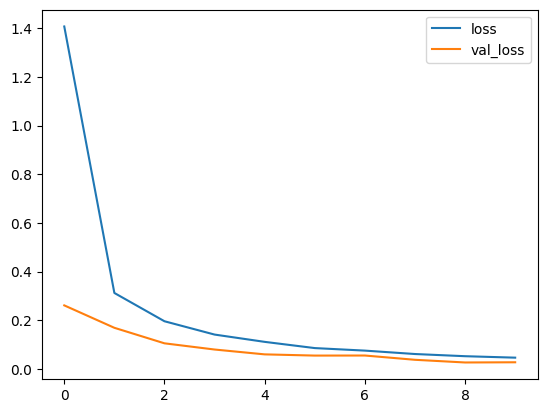

In [11]:
# Plotting training and validation loss
historyDf.loc[:, ['loss', 'val_loss']].plot()

<Axes: >

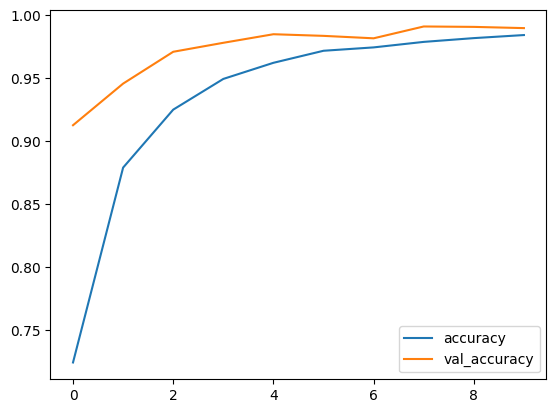

In [12]:
# Plotting training and validation accuracy
historyDf.loc[:, ['accuracy', 'val_accuracy']].plot()

In [13]:
# Evaluating model
score = model.evaluate(X_test, Y_test)[1] * 100
print(f'Validation accuracy of model : {score:.2f}%')

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9890 - loss: 0.0278
Validation accuracy of model : 99.00%
